In [1]:
%run c:/Projects/SOA/Homew4/homew4.py

[-0.56015727 -0.01747053]
0.31408138746471914


In [2]:
import math
def get_constriction(fi1,fi2):
    fi = fi1 + fi2
    K = 2.0 / abs( 2.0 - fi - math.sqrt(fi ** 2 - 4 * fi ) )
    return K



fi_values=[
 (2.2,2.2),
 (0.5,3.6),
 (2.3,1.9)   
]

topologies=['full','ring','4neighbours']

pso_variants={
    'main':{'w':1, 'constriction':False},
    'inertia':{'w':0.9, 'constriction':False},
    'constriction':{'w':1, 'constriction':True},
    
}

functions=[func_spehre,func_rosenbrock,func_rastrigin,func_griewank]
bounds={
    'func_spehre':{'low':[-20,-20],'up':[20,20]},
    'func_rosenbrock':{'low':[-30,-30],'up':[30,30]},
    'func_rastrigin':{'low':[-5.12,-5.12],'up':[5.12,5.12]},
    'func_griewank':{'low':[-200,-200],'up':[200,200]}
}



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_table(columns,data,title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    row_labels = None
    table_vals = data

    # Draw table
    the_table = plt.table(cellText=data,
                          colWidths=[0.1,0.1,0.11,0.35,0.2],
                          rowLabels=None,
                          colLabels=columns,
                          loc='bottom',
                            cellLoc = 'left')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(22)
    the_table.scale(4, 4)

    # Removing ticks and spines enables you to get the figure only with table
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.text(-1,1,title,fontsize=25)
    plt.show()

Function func_spehre


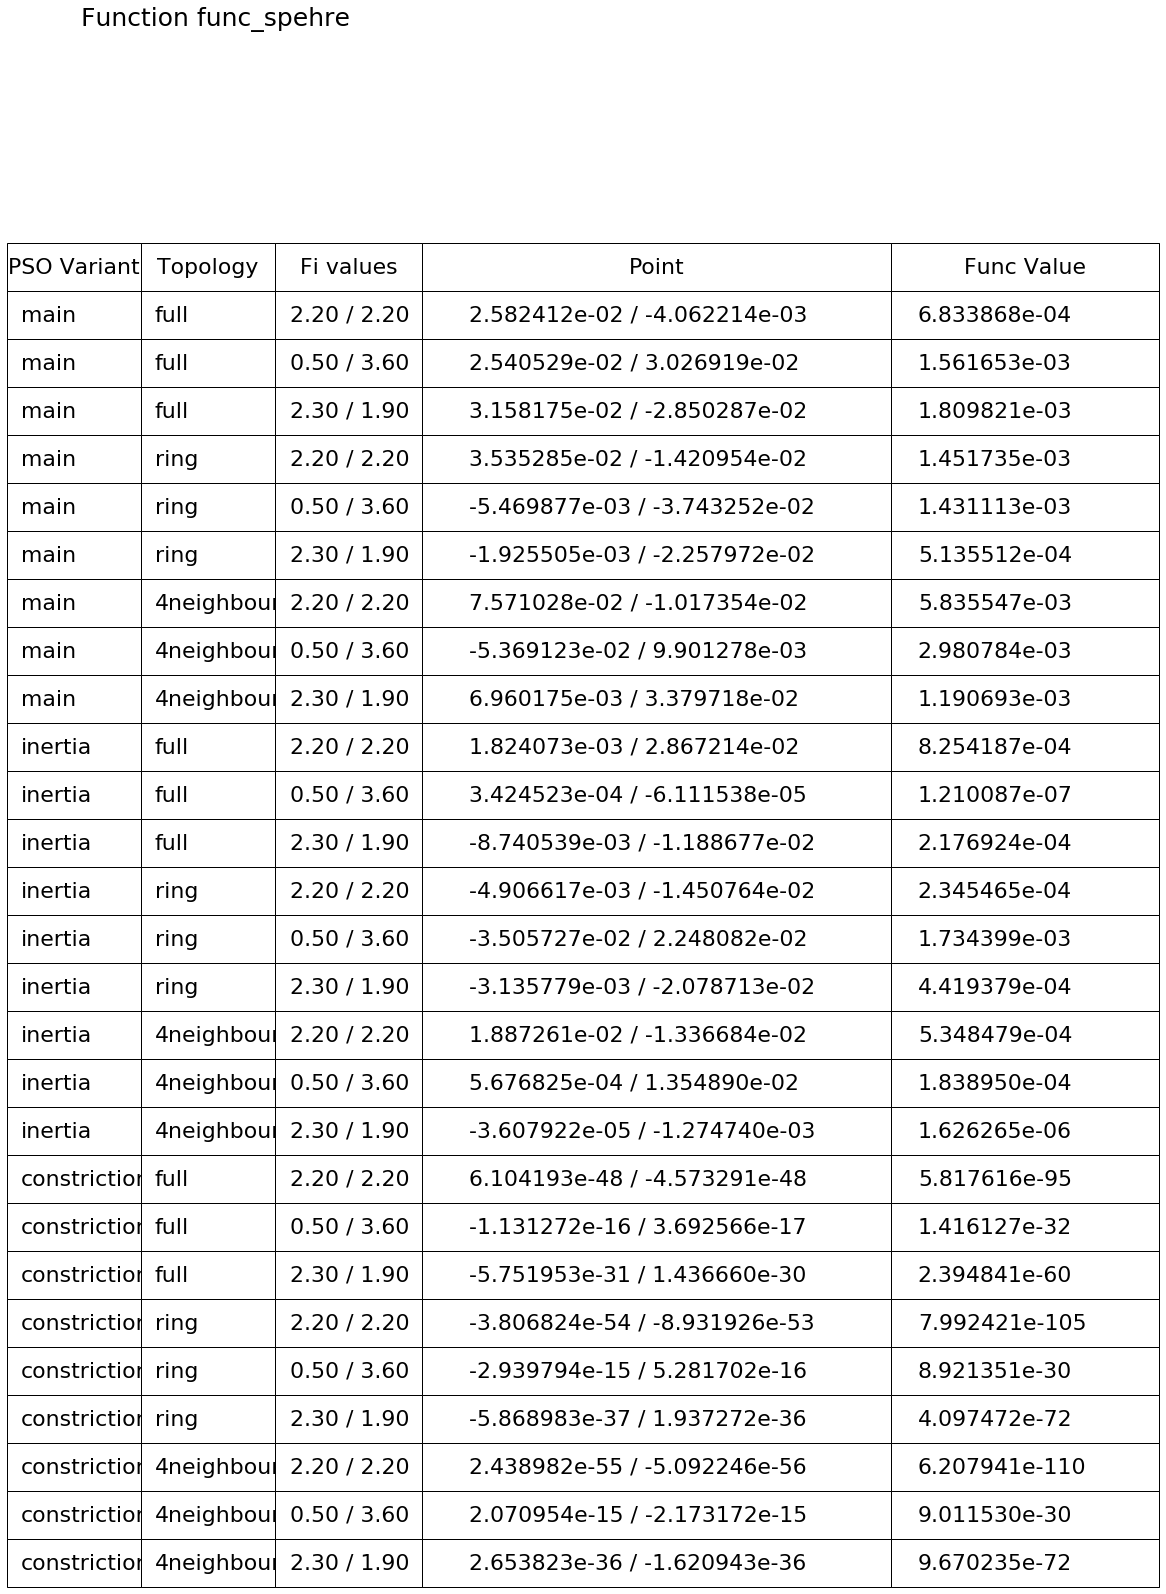



Function func_rosenbrock


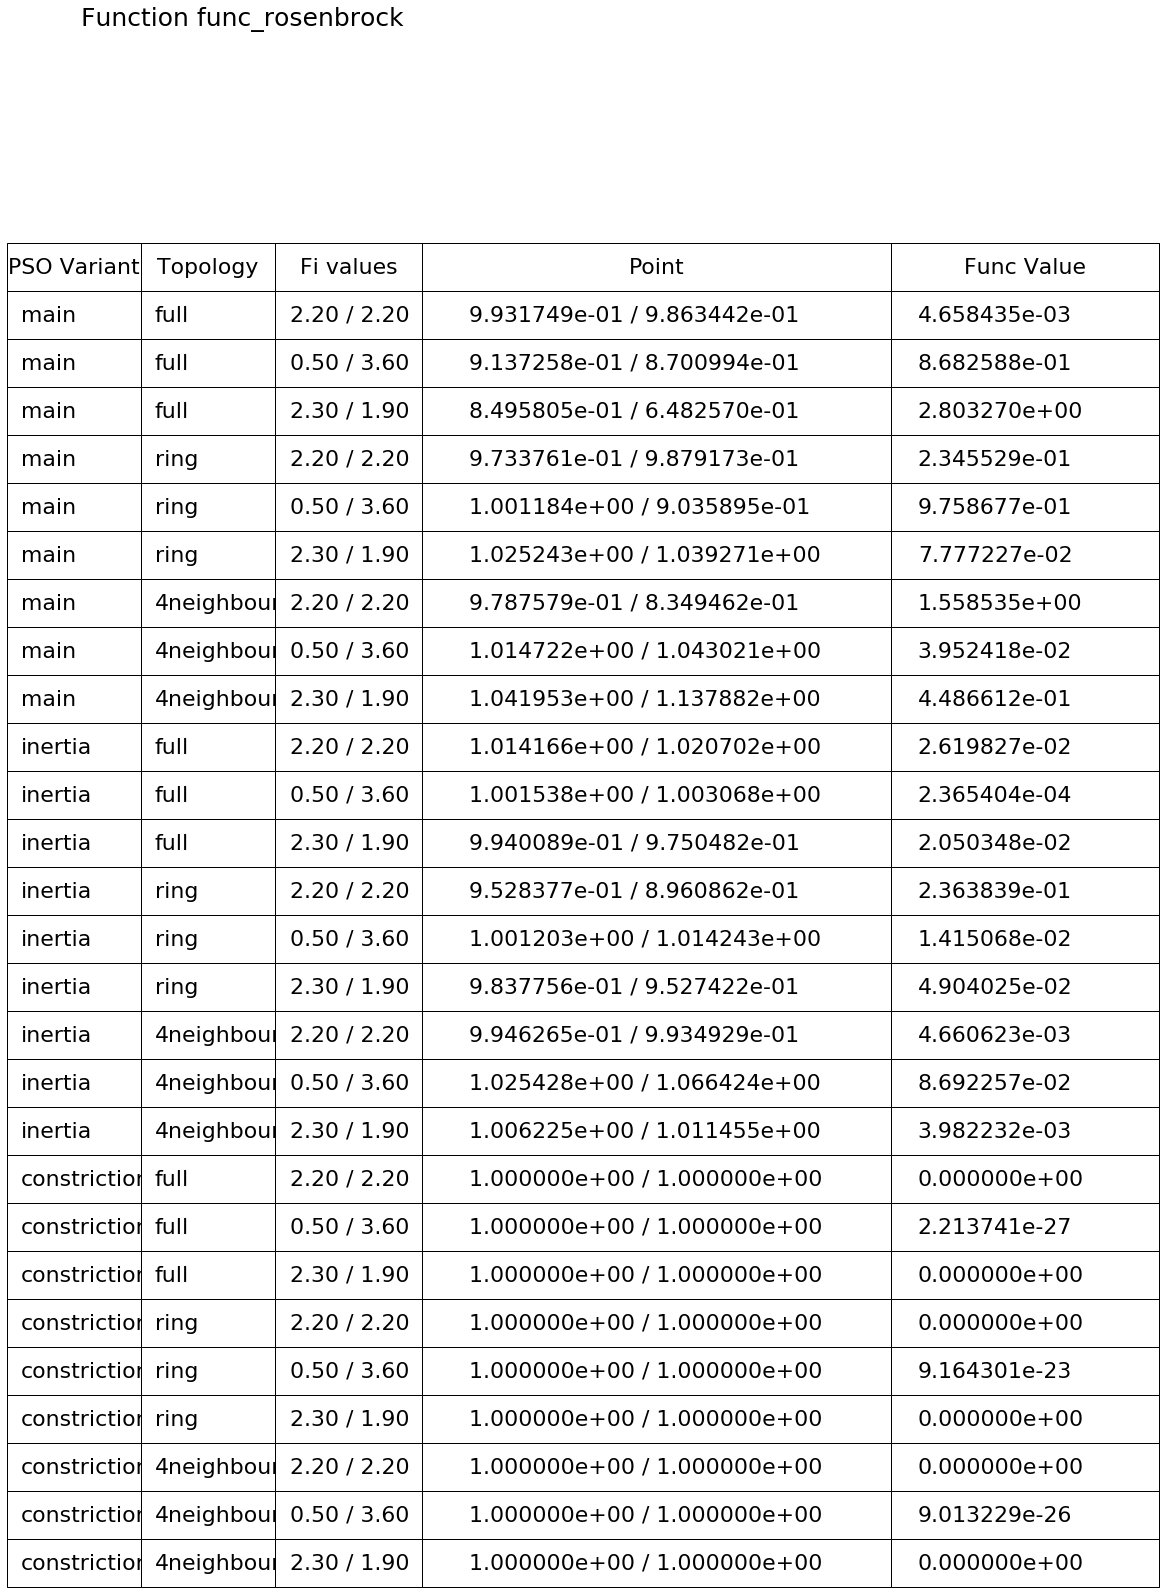



Function func_rastrigin


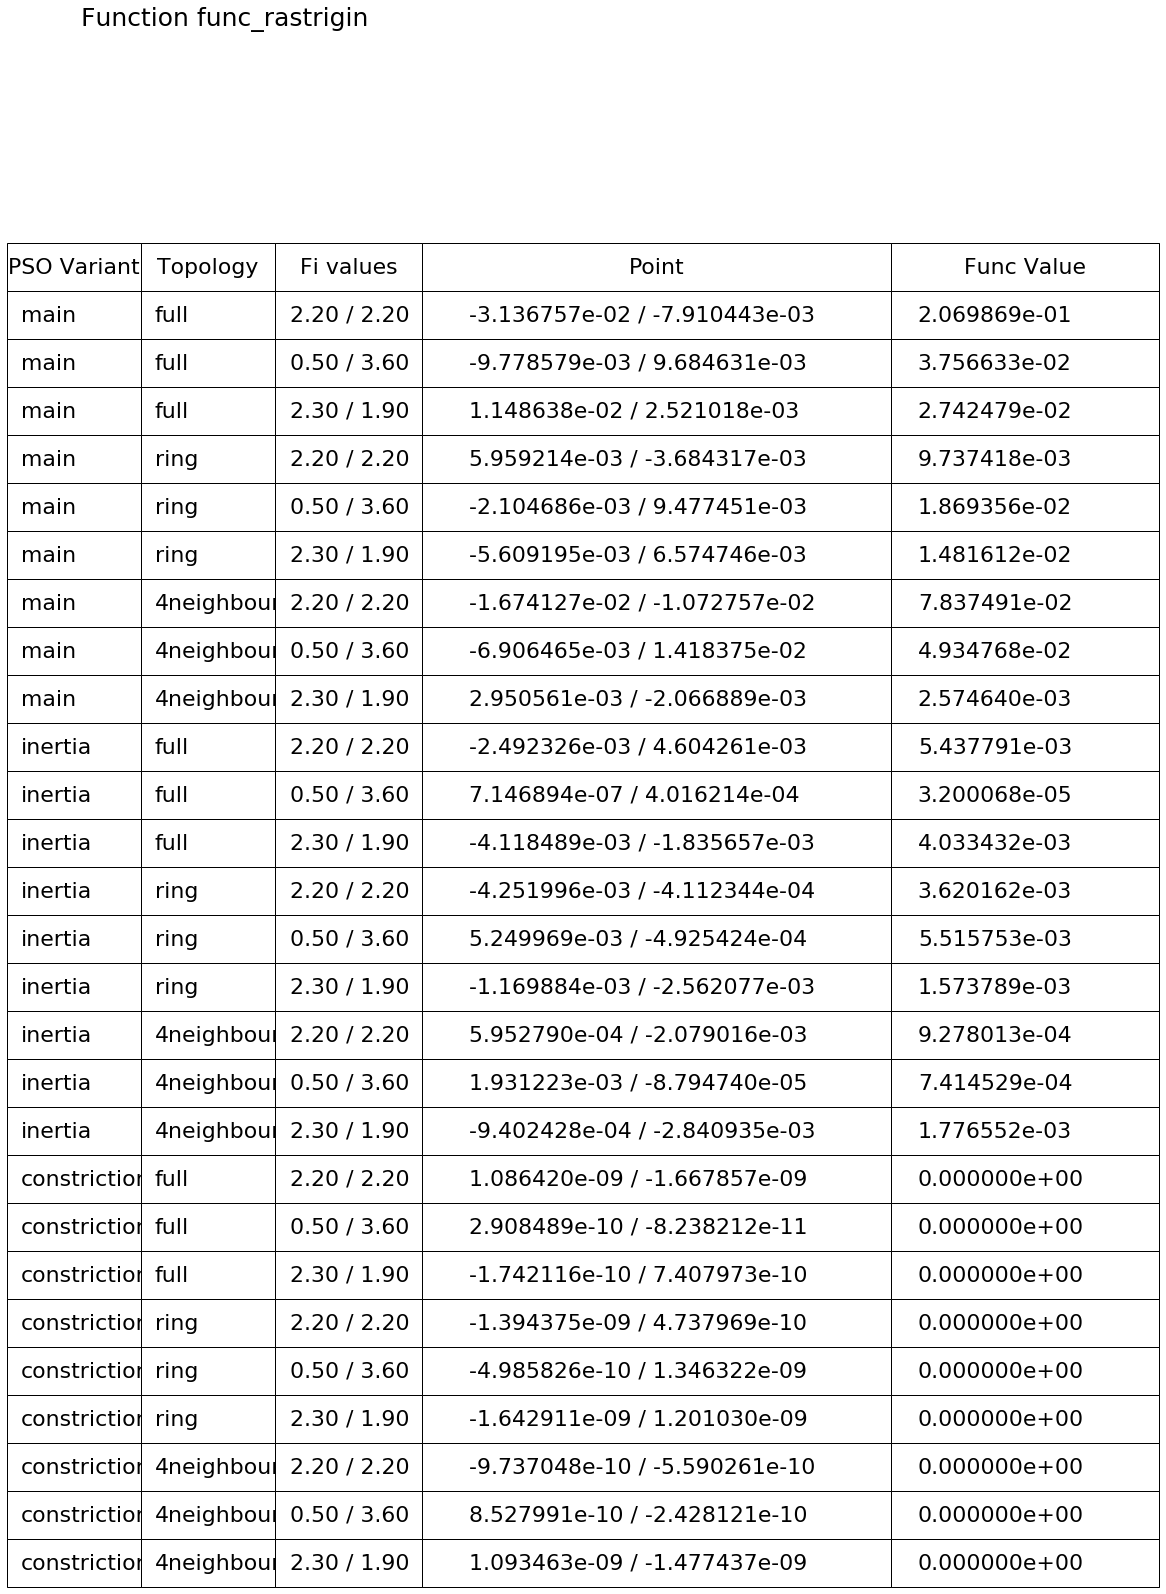



Function func_griewank


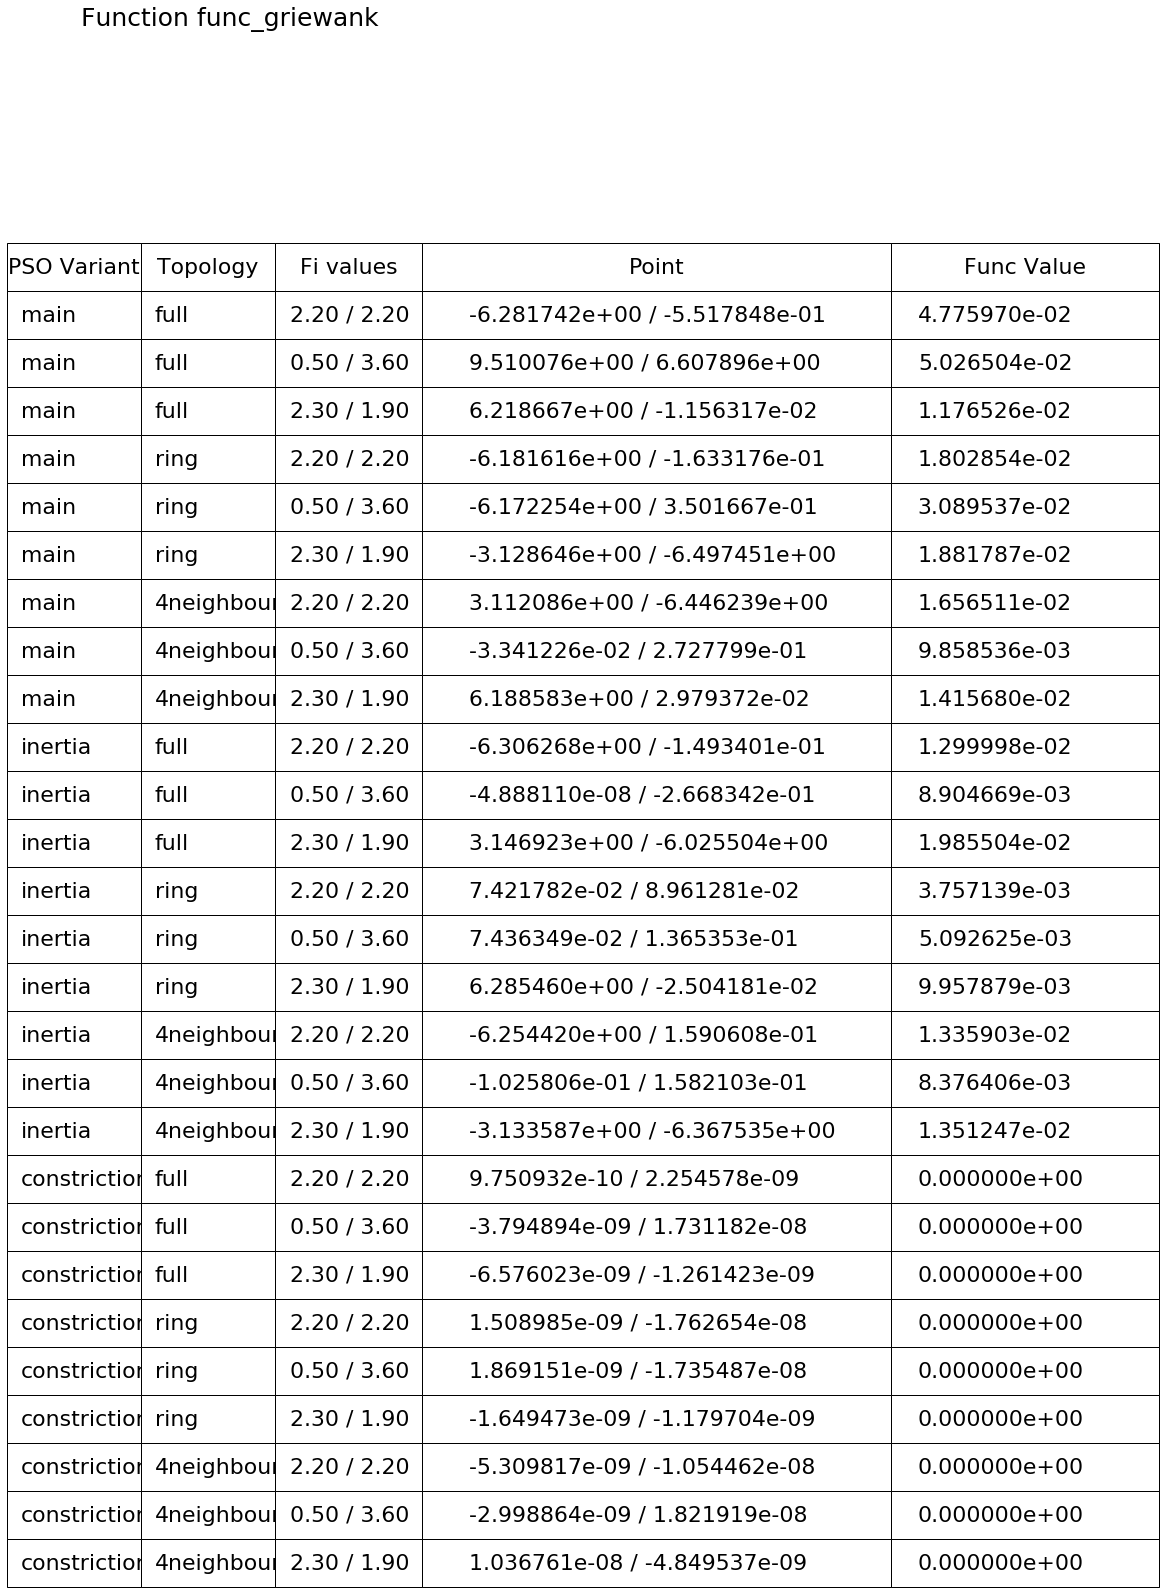

In [4]:
for func in functions:
    print("Function %s" % func.__name__)
    
    columns=('PSO Variant', 'Topology', 'Fi values', 'Point', 'Func Value')
    bb = bounds[func.__name__]
    
    data=[]
    
    for pso_variant in pso_variants:
        for topology in topologies:
            for fis in fi_values:
                d=[pso_variant, topology, "%.2f / %.2f" % fis]
                if pso_variants[pso_variant]['constriction']:
                   K = get_constriction(fis[0],fis[1])
                else:
                   K = None
                best_pos = None
                best_val = None
                for i in range(0,10):
                    bp, bv, _ = PSO(
                         topology_type=topology, costFunc=func, nr_dimensions=2,
                         fi1=fis[0], fi2=fis[1], w=pso_variants[pso_variant]['w'], constriction=K, 
                         bounds_down=bb['low'], bounds_up=bb['up']
                    ).run()
                    if (best_val is None) or (bv<best_val):
                        best_pos = bp
                        best_val = bv
                d.append("%e / %e" % (best_pos[0],best_pos[1]))
                d.append("%e" % best_val)
               
                data.append(d)
                
    plot_table(columns,data,"Function %s" % func.__name__)
    print("="*80)
    print("\n")
    

In [105]:
best_pos, best_val, hist = PSO(
        topology_type='full', costFunc=func_spehre, nr_dimensions=2,
        fi1=2.2, fi2=2.2, w=1.2, constriction=None, bounds_down=[-50,-50], bounds_up=[50,50]
    ).run()


In [108]:
get_constriction(2.2,2.2)

0.5366750419289199

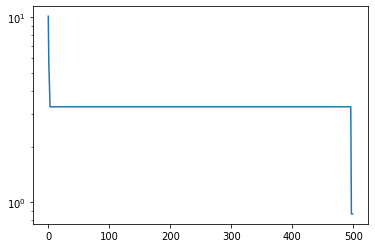

In [106]:
plt.plot(range(0,MAX_ITERATIONS),hist)
plt.yscale("log")
plt.show()